#Imports

In [1]:
import matplotlib as plt
import matplotlib.pyplot as pt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Loading the dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
rows, cols = 28, 28

In [3]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)

#Visualising the Dataset

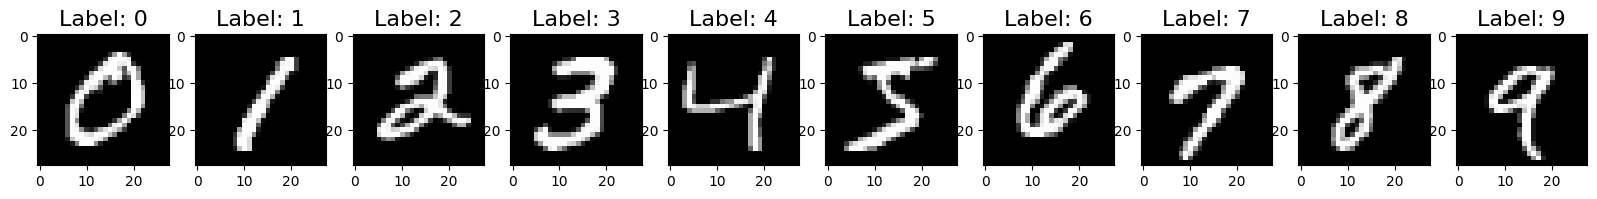

In [4]:
num_classes = 10
f, ax = pt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

#Preprocessing the data

a). Normalization

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

b). One hot encoding

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Building the model

In [7]:
model = tf.keras.Sequential()

def build_lenet(input_shape):

  #Convolution layer 1
  model.add(tf.keras.layers.Conv2D(filters = 6,
                                   kernel_size = (5,5),
                                   strides = (1,1),
                                   activation = 'tanh',
                                   input_shape = input_shape))
  
  #Subsampling layer 1
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                             strides = (2,2)))
  
  #Convolution layer 2
  model.add(tf.keras.layers.Conv2D(filters = 16,
                                   kernel_size = (5,5),
                                   strides = (1,1),
                                   activation = 'tanh'))
  
  #Subsampling layer 2
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                             strides = (2,2)))
  
  #Flattening layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layer 1
  model.add(tf.keras.layers.Dense(units = 120, activation = 'tanh'))

  #Flattening layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layer 2
  model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))

  #Output layer
  model.add(tf.keras.layers.Dense( units = 10, activation = 'softmax'))

  #Compile the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.001), metrics = ['accuracy'])

  #Summarizing the model
  model.summary()

  return model

In [8]:
lenet = build_lenet(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

#Training the model

In [9]:
epochs = 50

In [10]:
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 128,
                    verbose = 1)

Epoch 1/50
469/469 [==============================] - 38s 77ms/step - loss: 2.2626 - accuracy: 0.1696
Epoch 2/50
469/469 [==============================] - 26s 55ms/step - loss: 2.2132 - accuracy: 0.2155
Epoch 3/50
469/469 [==============================] - 26s 56ms/step - loss: 2.1625 - accuracy: 0.3097
Epoch 4/50
469/469 [==============================] - 26s 56ms/step - loss: 2.1095 - accuracy: 0.4168
Epoch 5/50
469/469 [==============================] - 27s 57ms/step - loss: 2.0533 - accuracy: 0.4842
Epoch 6/50
469/469 [==============================] - 27s 58ms/step - loss: 1.9937 - accuracy: 0.5255
Epoch 7/50
469/469 [==============================] - 26s 55ms/step - loss: 1.9309 - accuracy: 0.5559
Epoch 8/50
469/469 [==============================] - 25s 54ms/step - loss: 1.8655 - accuracy: 0.5791
Epoch 9/50
469/469 [==============================] - 26s 55ms/step - loss: 1.7984 - accuracy: 0.5979
Epoch 10/50
469/469 [==============================] - 26s 56ms/step - loss: 1.730

#Testing the model

In [11]:
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.5845 - accuracy: 0.8588
ACCURACY:  0.8587999939918518


#One Example

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 2s 7ms/step
[[1.2971536e-03 6.8770035e-04 5.5837253e-04 ... 9.4244879e-01
  2.0709417e-03 3.1818684e-02]
 [9.5865205e-02 3.4222998e-02 3.2550144e-01 ... 1.2747080e-04
  1.9453917e-01 5.6041067e-04]
 [5.3859240e-04 9.0593946e-01 1.4610715e-02 ... 1.5976071e-02
  2.0528590e-02 8.8789938e-03]
 ...
 [1.0591074e-03 2.7165664e-03 2.4017987e-03 ... 8.3936572e-02
  4.8325635e-02 2.9325616e-01]
 [2.8643783e-02 3.1735349e-02 8.1635900e-03 ... 1.4983337e-02
  3.0889282e-01 6.7242436e-02]
 [4.5272417e-02 2.8578454e-04 2.1886278e-02 ... 1.8046204e-04
  3.7650994e-03 1.7446924e-03]]
[7 2 1 ... 4 8 6]


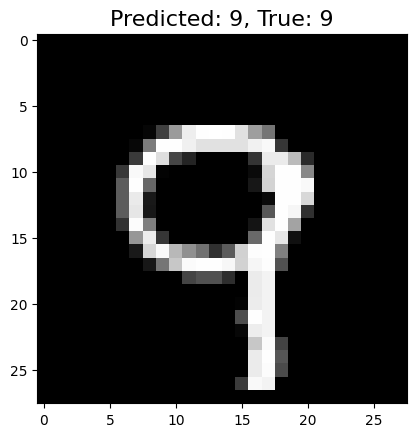

In [13]:
# Visualize for one example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

pt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
pt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

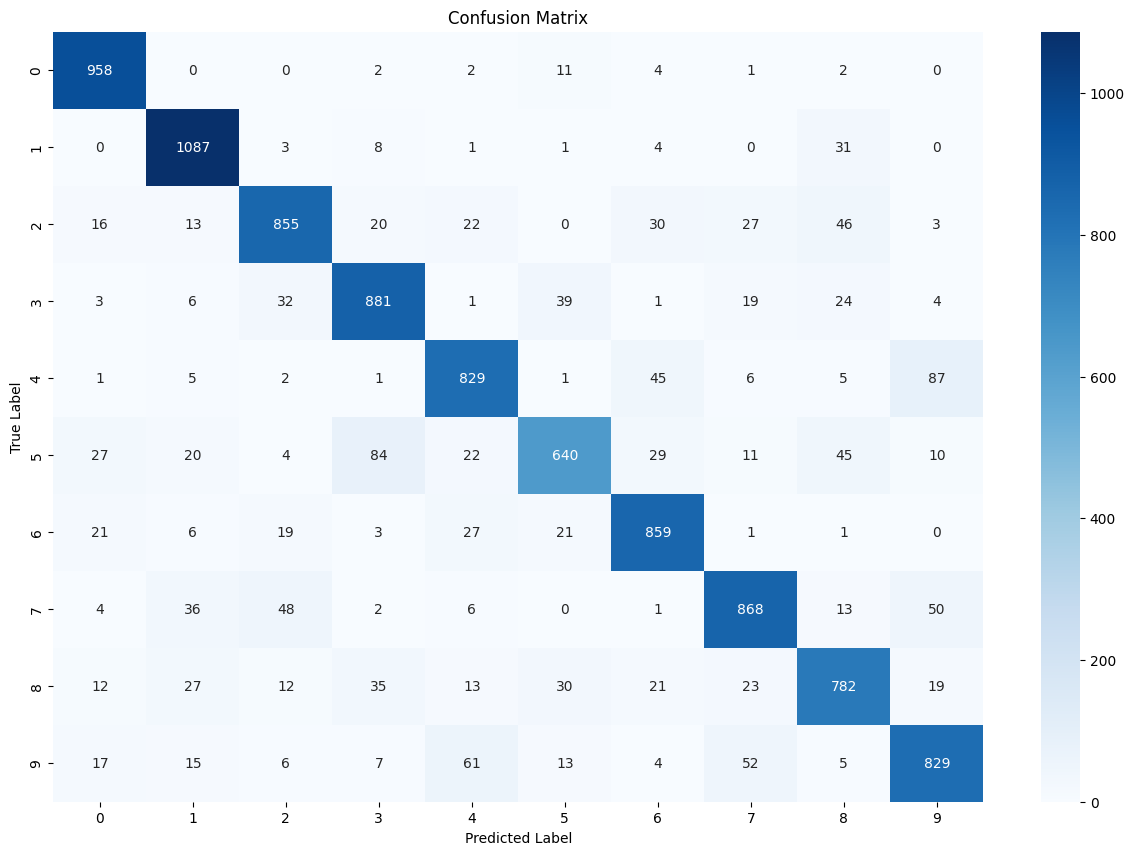

In [14]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = pt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#Tranformation/Reshaping into 28x28 pixel

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print("Training Data ", x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print("Testing Data ", x_train.shape, y_train.shape)

Training Data  (60000, 28, 28) (60000, 10)
Testing Data  (60000, 28, 28) (60000, 10)
